<a href="https://colab.research.google.com/github/3Hamza/Machine-Learning/blob/master/MNSIT_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST PREDICTION
In this project, we will be using ML algorithms to predict the handwriting of test sample present in MNIST dataset.

# Loading Datasets


In [1]:
# Calling out Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.datasets import mnist


In [2]:
# Load the datasets
(X_train,y_train),(X_test,y_test)=mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
# Getting info on the datasets
print('Train datasets: X=%s and y=%s'%(X_train.shape,y_train.shape))
print('Test datasets: X=%s and y=%s'%(X_test.shape,y_test.shape))

Train datasets: X=(60000, 28, 28) and y=(60000,)
Test datasets: X=(10000, 28, 28) and y=(10000,)


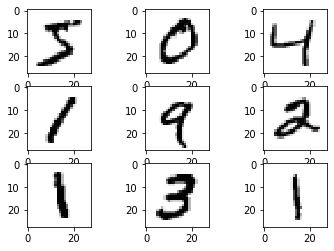

In [4]:
# Plotting few images
for i in range(9):
  plt.subplot(3,3,1+i)
  plt.imshow(X_train[i], cmap=plt.cm.binary ,interpolation='none')
plt.show()

# Data Preprocessing


In [5]:
# Normalize the data
X_train=tf.keras.utils.normalize(X_train, axis=1)
X_test=tf.keras.utils.normalize(X_test,axis=1)

In [6]:
print("X_train shape: ",X_train.shape)
print("X_test: ",X_test.shape)

X_train shape:  (60000, 28, 28)
X_test:  (10000, 28, 28)


In [7]:
print(X_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [8]:
# Checking the y_train data
print(np.unique(y_train, return_counts=True))
print('y_train:',y_train.shape)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))
y_train: (60000,)


In [ ]:
# Encoding the y_train label to a vector data using one-hot encoding
y_train=tf.keras.utils.to_categorical(y_train)
y_test=tf.keras.utils.to_categorical(y_test)
print('y_train shape after encoding:',y_train.shape)

y_train shape after encoding: (60000, 10, 2)


# Building Model

In [9]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

In [10]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

In [11]:
history=model.fit(X_train,y_train,epochs=10, batch_size=128, verbose=2, validation_data=(X_test,y_test))

Epoch 1/10
469/469 - 4s - loss: 0.3747 - accuracy: 0.8974 - val_loss: 0.1984 - val_accuracy: 0.9406
Epoch 2/10
469/469 - 1s - loss: 0.1534 - accuracy: 0.9537 - val_loss: 0.1335 - val_accuracy: 0.9577
Epoch 3/10
469/469 - 1s - loss: 0.1054 - accuracy: 0.9685 - val_loss: 0.1128 - val_accuracy: 0.9652
Epoch 4/10
469/469 - 1s - loss: 0.0794 - accuracy: 0.9753 - val_loss: 0.1031 - val_accuracy: 0.9693
Epoch 5/10
469/469 - 1s - loss: 0.0629 - accuracy: 0.9811 - val_loss: 0.0897 - val_accuracy: 0.9728
Epoch 6/10
469/469 - 1s - loss: 0.0493 - accuracy: 0.9850 - val_loss: 0.0889 - val_accuracy: 0.9722
Epoch 7/10
469/469 - 1s - loss: 0.0395 - accuracy: 0.9879 - val_loss: 0.0908 - val_accuracy: 0.9726
Epoch 8/10
469/469 - 1s - loss: 0.0313 - accuracy: 0.9904 - val_loss: 0.0854 - val_accuracy: 0.9732
Epoch 9/10
469/469 - 1s - loss: 0.0251 - accuracy: 0.9926 - val_loss: 0.0959 - val_accuracy: 0.9736
Epoch 10/10
469/469 - 1s - loss: 0.0195 - accuracy: 0.9944 - val_loss: 0.0890 - val_accuracy: 0.9749

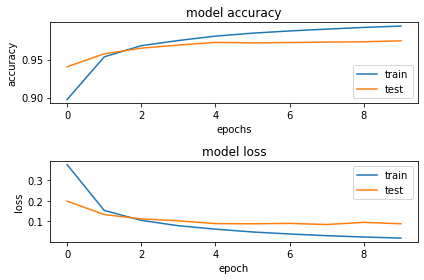

In [15]:
# Plotting the metrics
fig=plt.figure()
plt.subplot(211)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()


# Evaluating Model's Performance


In [19]:
val_loss, val_acc=model.evaluate(X_test,y_test)
print("Test Loss : %s \
        Test Accuracy: %s"%(val_loss,val_acc))

313/313 [==============================] - 1s 2ms/step - loss: 0.0890 - accuracy: 0.9749
Test Loss : 0.0889916643500328         Test Accuracy: 0.9749000072479248


In [20]:
# Saving The model 
model.save('mnist_keras.model')
mnist_model=tf.keras.models.load_model('mnist_keras.model')

INFO:tensorflow:Assets written to: mnist_keras.model/assets


In [24]:
# Predicting the model
predictions=model.predict(X_test)

In [25]:
print(np.argmax(predictions[0]))

7


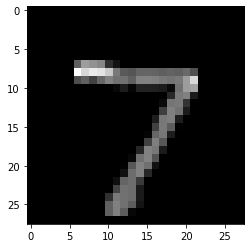

In [26]:
plt.imshow(X_test[0],cmap='gray')
plt.show()

This the model that we made!!!